*Data Sci Eng Methods*

---


Final Project - Group 16

## ***Exploring GDP per Capita Income and it's correlation with Mental Health for Different Regions***

    What is the problem statement?
    What did we do?
    How well did it work?
    What did we learn?

### **Exploring GDP per Capita Income and it's correlation with Mental Health for Different Regions**

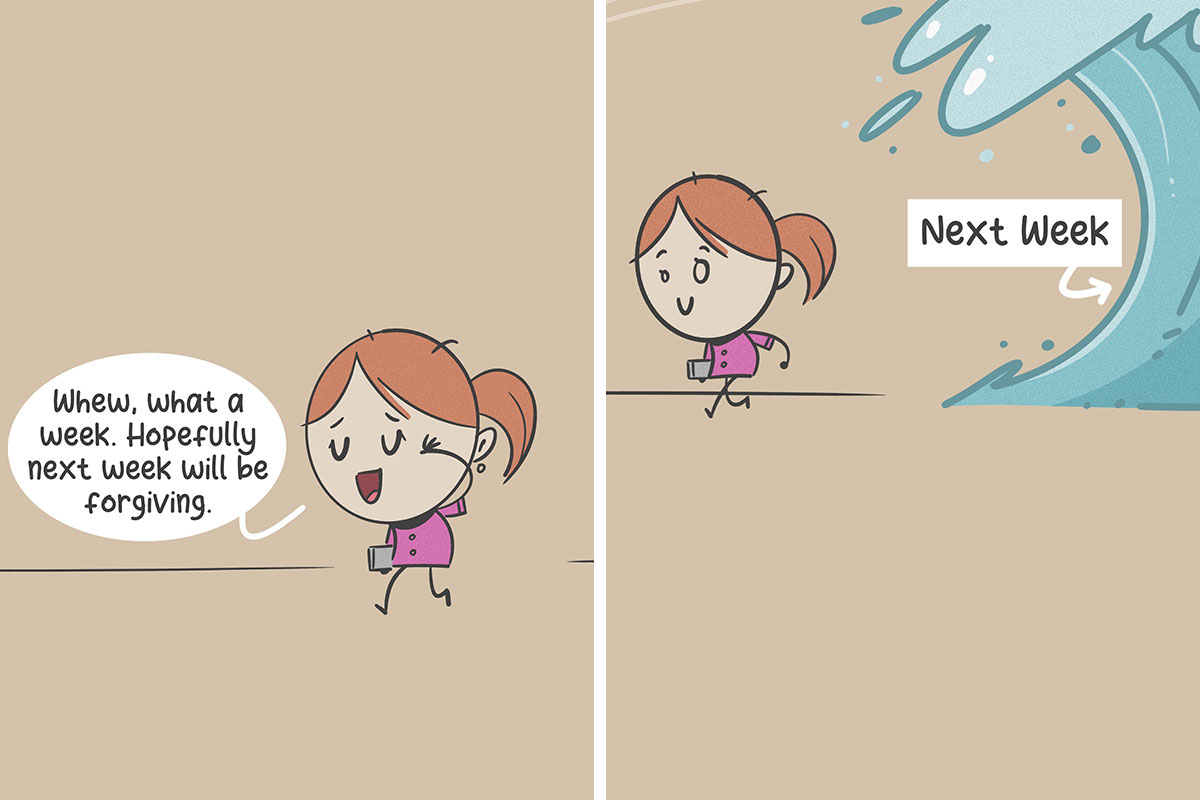

**Goal : **  



    Checking Data Quality by performing different EDA techniques
    Feature Selection
    Modeling - Training Models, Selecting Best Model, Hyperparameter Tuning
    Model Interpretibility ?
    Reports and Visualizations

### Dataset Summary :
---

The dataset consists of around 6800 entries covering years from 1990 to 2019.

The datasets include the count of people suffering from depressive disorders grouped by Country and Year and the GDP per capita to understand how depression affects GDP as well


Both the count of depressive disorder cases and GDP per capita show a wide range of values, indicating variability across different countries and economic conditions.


According to the **World Health Organization**, An estimated 3.8% of the population experience depression, including 5% of adults (4% among men and 6% among women), and 5.7% of adults older than 60 years. Approximately 280 million people in the world have depression (1). **Depression is about 50% more common among women than among men**. Worldwide, more than 10% of pregnant women and women who have just given birth experience depression (2). More than 700 000 people die due to suicide every year. Suicide is the fourth leading cause of death in 15–29-year-olds.



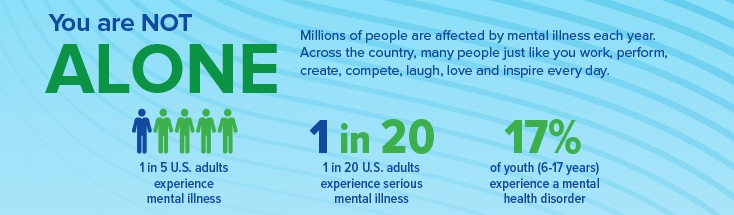

The study aims to **predict how changes in GDP per capita influence the share of the population** affected by depressive disorders. By analyzing data from various countries over multiple years, this research seeks to identify economic predictors of mental health outcomes and provide insights that could help in formulating effective mental health strategies and economic policies.



**Impact in High-Income Countries**
In high-income countries, despite better economic conditions and generally more accessible healthcare services, the prevalence of depression symptoms as shown in the chart is significant.

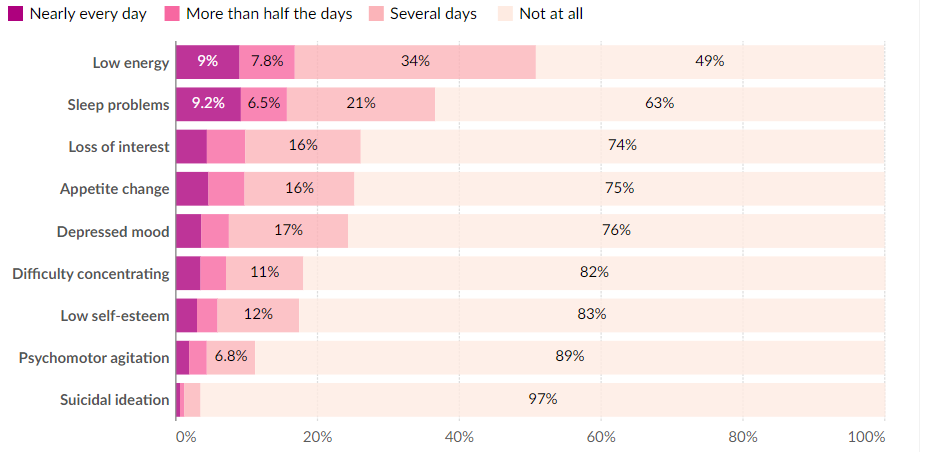

**Potential Impact on Developing Countries**

The situation in developing countries could be even more challenging due to several factors:
1. *Resource Limitations*: There is often a lack of mental health resources, such as fewer mental health professionals per capita and less access to treatment facilities or medications.

2. *Higher Stigma Levels*: Cultural perceptions of mental health in many developing countries can result in higher levels of stigma, leading to significant underreporting and underdiagnosing of depression.

3. *Economic and Social Stressors*: High levels of poverty, unemployment, and social instability can exacerbate mental health issues, increasing the prevalence and severity of depression.

**Broader Impact on Population**

1.   *Productivity Loss*: Depression can significantly reduce an individual's ability to function, impacting educational achievement, productivity, and economic output.

2.   *Social Relationships*: Depression can strain relationships, leading to social isolation and worsening mental health outcomes.
Healthcare Costs: Long-term, untreated depression can lead to comorbidities, increasing healthcare usage and costs.

3.   *Quality of Life*: Beyond economic factors, depression severely affects the quality of life and well-being of individuals and their families.

**Okay, let's get down to business**

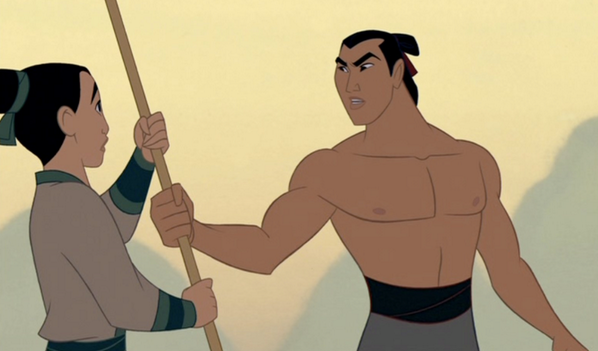

## Dataset Overview

Import necessary packages

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

Load and read the dataset and store it in the variable "data1"

In [85]:
data1 = pd.read_csv('https://raw.githubusercontent.com/Vishodhan/Mental-health-annual-income-correlation/main/number-suffering-from-depression-by-region.csv')

Get an overview of what we're dealing with

In [86]:
data1.head()

,Entity,Code,Year,"Current number of cases of depressive disorders, in both sexes aged all ages"
0,Afghanistan,AFG,1990,439836.56
1,Afghanistan,AFG,1991,478890.22
2,Afghanistan,AFG,1992,545448.80
3,Afghanistan,AFG,1993,593044.44
4,Afghanistan,AFG,1994,613914.56


In [87]:
data1.shape

(6840, 4)

In [88]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 4 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Entity                                                                        6840 non-null   object 
 1   Code                                                                          6150 non-null   object 
 2   Year                                                                          6840 non-null   int64  
 3   Current number of cases of depressive disorders, in both sexes aged all ages  6840 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 213.9+ KB


Oh no, our data is missing!

In [89]:
data1.describe()

,Year,"Current number of cases of depressive disorders, in both sexes aged all ages"
count,6840.000000,6.840000e+03
mean,2004.500000,5.851676e+06
std,8.656074,2.196947e+07
min,1990.000000,3.413094e+01
25%,1997.000000,6.159246e+04
50%,2004.500000,2.600903e+05
75%,2012.000000,1.024756e+06
max,2019.000000,2.796063e+08


In [90]:
data1.columns

Index(['Entity', 'Code', 'Year',
       'Current number of cases of depressive disorders, in both sexes aged all ages'],
      dtype='object')

In [91]:
#Column name too long
data1.rename(columns={"Current number of cases of depressive disorders, in both sexes aged all ages":"Count of depressive disorder cases","Entity":"Country"},inplace=True)


Check for Missing Data.


They're harmful for the model and can impact model performance and accuracy!

In [92]:
data1.isnull().sum()

Country                                 0
Code                                  690
Year                                    0
Count of depressive disorder cases      0
dtype: int64

In [93]:
data1.shape

(6840, 4)

In [94]:
data1.Year.value_counts()
#This gives us the insights about how the year values and their count.

Year
1990    228
1991    228
2018    228
2017    228
2016    228
2015    228
2014    228
2013    228
2012    228
2011    228
2010    228
2009    228
2008    228
2007    228
2006    228
2005    228
2004    228
2003    228
2002    228
2001    228
2000    228
1999    228
1998    228
1997    228
1996    228
1995    228
1994    228
1993    228
1992    228
2019    228
Name: count, dtype: int64

In [95]:
print(data1.Country.unique(),end="\t")

['Afghanistan' 'African Region (WHO)' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'East Asia & Pacific (WB)'
 'East Timor' 'Eastern Mediterranean Region (WHO)' 'Ecuador' 'Egypt'
 'El Salvador' 'England' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Europe & Central Asia (WB)'
 'European Region (WHO)' 'Fiji' 'Finland' 'France' 'G20' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Green

The countries' values has a lot of variation in it. For example "(WB)" and "(WHO)" at the end of country names. These issues shall be handled later after exploring the second dataset

## Time to explore the depression vs GDP dataset

In [96]:
data2 = pd.read_csv('https://raw.githubusercontent.com/Vishodhan/Mental-health-annual-income-correlation/main/depressive-disorders-prevalence-vs-gdp-per-capita.csv')

Load and read the dataset and store it in the variable "data2"

In [97]:
data2.head()

,Entity,Code,Year,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,"GDP per capita, PPP (constant 2017 international $)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,Asia
1,Afghanistan,AFG,1990,4.996118,NaN,NaN
2,Afghanistan,AFG,1991,4.989290,NaN,NaN
3,Afghanistan,AFG,1992,4.981346,NaN,NaN
4,Afghanistan,AFG,1993,4.976958,NaN,NaN


In [98]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7298 entries, 0 to 7297
Data columns (total 6 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Entity                                                                          7298 non-null   object 
 1   Code                                                                            6762 non-null   object 
 2   Year                                                                            7298 non-null   int64  
 3   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  6420 non-null   float64
 4   GDP per capita, PPP (constant 2017 international $)                             6346 non-null   float64
 5   Continent                                                                       285 non-null    object 
dtypes: float64(2), in

In [99]:
#Beautification
data2.rename(columns={'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized':'Share of depressive disorder cases',
                      'GDP per capita, PPP (constant 2017 international $)':'GDP per capita', "Entity":"Country"},inplace=True)

In [100]:
data2.describe()

,Year,Share of depressive disorder cases,GDP per capita
count,7298.000000,6420.000000,6346.000000
mean,2005.572897,3.767036,18068.999300
std,9.185805,0.925286,20193.547754
min,1990.000000,1.522333,436.376400
25%,1998.000000,3.080036,3673.792850
50%,2006.000000,3.636772,10486.217500
75%,2014.000000,4.366252,26409.074000
max,2021.000000,7.645899,157602.480000


In [101]:
data2.columns

Index(['Country', 'Code', 'Year', 'Share of depressive disorder cases',
       'GDP per capita', 'Continent'],
      dtype='object')

Check for Missing Data.


They're harmful for the model and can impact model performance and accuracy!

In [102]:
data2.isna().sum()

Country                                  0
Code                                   536
Year                                     0
Share of depressive disorder cases     878
GDP per capita                         952
Continent                             7013
dtype: int64

There seems to be some null values.😲

Let's dig down deeper



In [103]:
data2.Code.value_counts()

Code
LUX         32
PSE         32
MLI         32
MLT         32
MHL         32
            ..
PYF          1
SPM          1
MAF          1
GUF          1
OWID_ABK     1
Name: count, Length: 286, dtype: int64

Oh, its just the country codes. We can drop it from both datasets before merging. Cool!

In [104]:
data2['Share of depressive disorder cases'].describe()

count    6420.000000
mean        3.767036
std         0.925286
min         1.522333
25%         3.080036
50%         3.636772
75%         4.366252
max         7.645899
Name: Share of depressive disorder cases, dtype: float64

(array([ 117.,  550., 1927., 1294., 1349.,  791.,  213.,  120.,   42.,
          17.]),
 array([1.5223331 , 2.13468972, 2.74704634, 3.35940296, 3.97175958,
        4.5841162 , 5.19647282, 5.80882944, 6.42118606, 7.03354268,
        7.6458993 ]),
 <BarContainer object of 10 artists>)

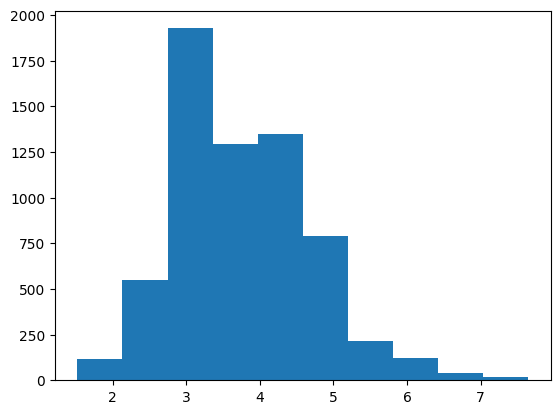

In [105]:
plt.hist(data2['Share of depressive disorder cases'])
# Alright, so the plot indicates that the data is skewed to the left.

Okay, so now we merge data1 and data2 so that we get the list of countries along with the count of the people who suffer from depressive disorder

In [106]:
data1.columns,data2.columns

(Index(['Country', 'Code', 'Year', 'Count of depressive disorder cases'], dtype='object'),
 Index(['Country', 'Code', 'Year', 'Share of depressive disorder cases',
        'GDP per capita', 'Continent'],
       dtype='object'))

As promised, we've dropped the Code column, continent and share of depressive cases as well as they wont be required for our prediction

In [107]:
data1.drop(columns={"Code"},axis=1,inplace=True)
data2.drop(columns={"Continent","Code"},axis=1,inplace=True)

In [108]:
# Data Reunion
data = pd.merge(left=data1,right=data2, on=['Country','Year'])

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6240 entries, 0 to 6239
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             6240 non-null   object 
 1   Year                                6240 non-null   int64  
 2   Count of depressive disorder cases  6240 non-null   float64
 3   Share of depressive disorder cases  6150 non-null   float64
 4   GDP per capita                      5481 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 243.9+ KB


In [110]:
data.columns

Index(['Country', 'Year', 'Count of depressive disorder cases',
       'Share of depressive disorder cases', 'GDP per capita'],
      dtype='object')

Yes, we have to explore the merged dataset as well.

In [111]:
data.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', '

**Let's take a closer look at what we got**

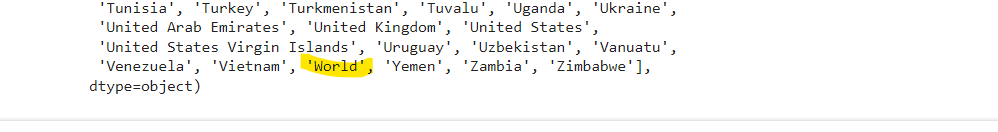



Glancing at the country values, there are few countries ending in paranthesis which we may have to clean.

**What??!!** Since when is 'World' a country? United Nations doesn't recognize it. Let's drop it and also check the countries with brackets in their name

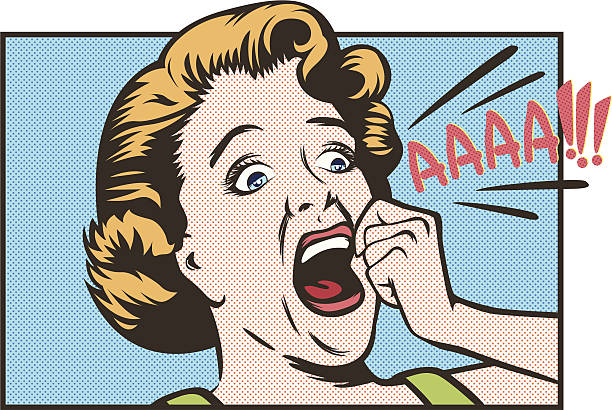

In [112]:
countries = set()
for country in data.Country:
    if '(' in country:
        countries.add(country)
print(countries)



{'South Asia (WB)', 'Micronesia (country)', 'Sub-Saharan Africa (WB)', 'North America (WB)'}


In [113]:
# Regular expression to replace the WHO and WB. It is said, you can conquer the world if you know RegEx.
data.Country.replace(to_replace=r'\s\([A-Z]+\)',value='',regex=True,inplace=True)
# I used ChatGPT

In [114]:
remove_countries = ['World','South Asia','Sub-Saharan Africa','North America']

data.drop(data[data["Country"].isin(remove_countries)].index,inplace=True)

In [115]:
median_gdp = data.groupby('Country')['GDP per capita'].median()

# Replace the null values with the median GDP for each country
data['GDP per capita'] = data['GDP per capita'].fillna(data['Country'].map(median_gdp))


In [116]:
nan_countries = data[data['GDP per capita'].isna()]['Country'].to_list()
data.drop(data[data['Country'].isin(nan_countries)].index,inplace=True)

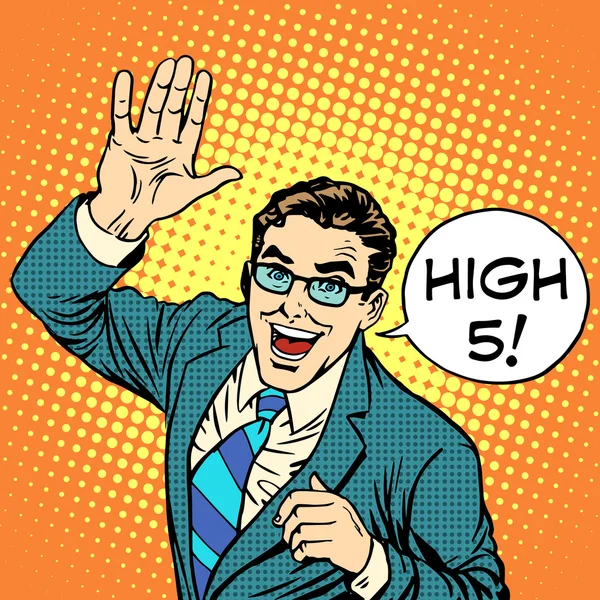

Dual-axis line plot:

The dual-axis line plot provides a concise and effective visualization of how GDP per capita and depressive disorder cases have changed over time, offering insights into their relationship and potential implications for public health and policy interventions.

The plot shows how GDP per capita (measured in currency units) and depressive disorder cases (count of cases) have evolved over time (years).

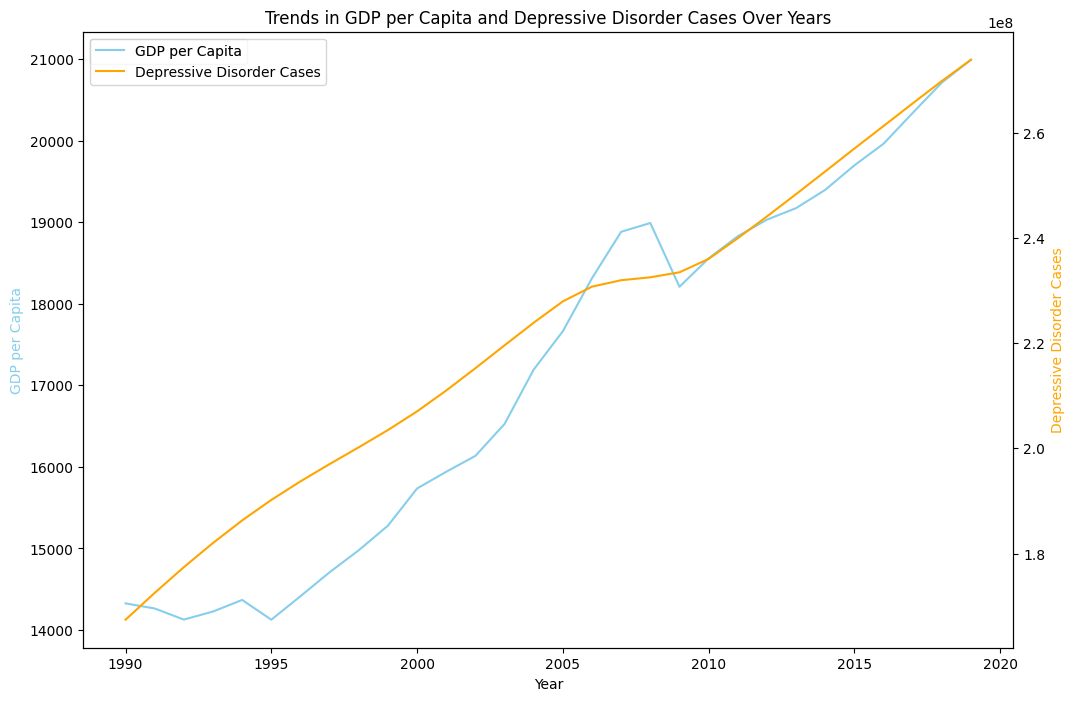

In [117]:


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' contains the original dataset

# Pivot the data to aggregate by year and calculate mean GDP per capita and total cases
pivot_data = data.pivot_table(index='Year', values=['GDP per capita', 'Count of depressive disorder cases'],
                              aggfunc={'GDP per capita': 'mean', 'Count of depressive disorder cases': 'sum'})

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot GDP per capita on primary y-axis
sns.lineplot(data=pivot_data, x=pivot_data.index, y='GDP per capita', ax=ax1, label='GDP per Capita', color='skyblue')

# Create a secondary y-axis and plot depressive disorder cases on it
ax2 = ax1.twinx()
sns.lineplot(data=pivot_data, x=pivot_data.index, y='Count of depressive disorder cases', ax=ax2,
             label='Depressive Disorder Cases', color='orange')

# Set labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per Capita', color='skyblue')
ax2.set_ylabel('Depressive Disorder Cases', color='orange')
plt.title('Trends in GDP per Capita and Depressive Disorder Cases Over Years')

# Get handles and labels for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# Display the legend for both axes
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Show plot
plt.show()


Choropleth Map:

The map is designed to show how the prevalence of depressive disorder cases varies geographically, providing insights into the global burden of this mental health condition.

Each country on the map is shaded with a color gradient ranging from light to dark. Darker colors (e.g., green or blue) indicate a lower number of reported depressive disorder cases in that country, while lighter colors represent higher numbers.

Choropleth maps are effective tools for communicating geographical patterns and disparities in data. They make it easy to grasp the distribution of a variable (in this case, depressive disorder cases) across different regions or countries.

In [118]:
import plotly.express as px



# Create a choropleth map for depressive disorder cases
fig = px.choropleth(data,
                     locations='Country',
                     locationmode='country names',
                     color='Share of depressive disorder cases',
                     hover_name='Country',
                     title='Global Distribution of Depressive Disorder Cases',
                     color_continuous_scale='Viridis')

fig.show()


Line graph:

This graph illustrates how the prevalence of depressive disorders has changed over time in the United States, providing valuable information for understanding public health trends and potential policy implications.

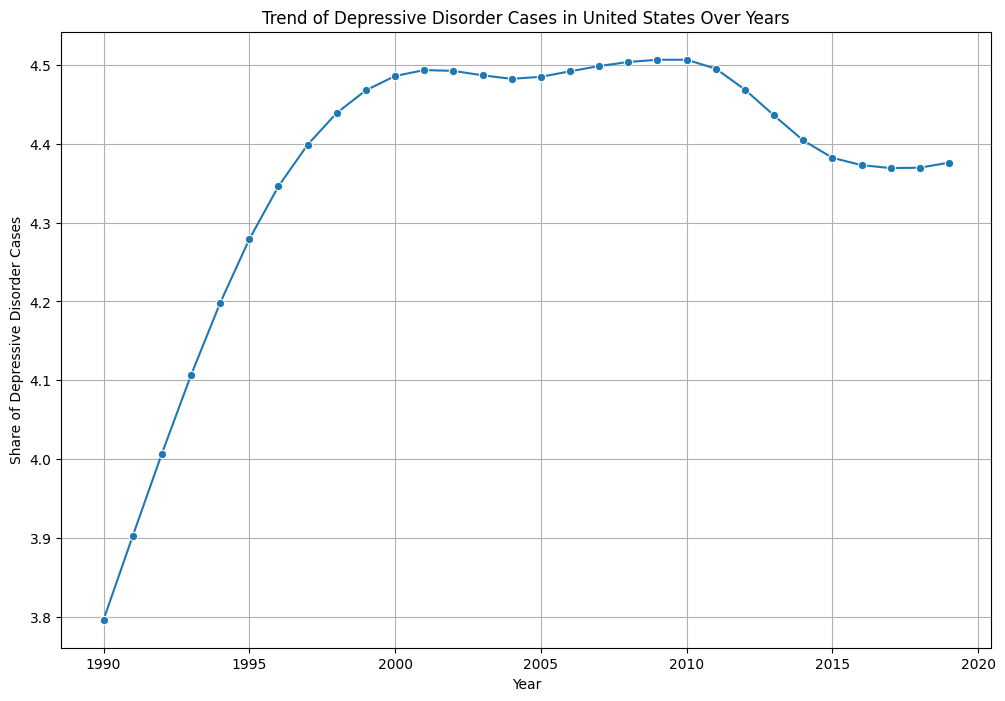

In [119]:
# Select a specific country for trend analysis
selected_country = 'United States'

# Filter data for the selected country
country_data = data[data['Country'] == selected_country]

plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Share of depressive disorder cases', data=country_data, marker='o')
plt.xlabel('Year')
plt.ylabel('Share of Depressive Disorder Cases')
plt.title(f'Trend of Depressive Disorder Cases in {selected_country} Over Years')
plt.grid(True)
plt.show()

Bar graph:

This Bar graph visualization provides a clear comparison of the average number of depressive disorder cases across different countries, highlighting the top 10 countries with the highest prevalence of depressive disorders based on the provided dataset.

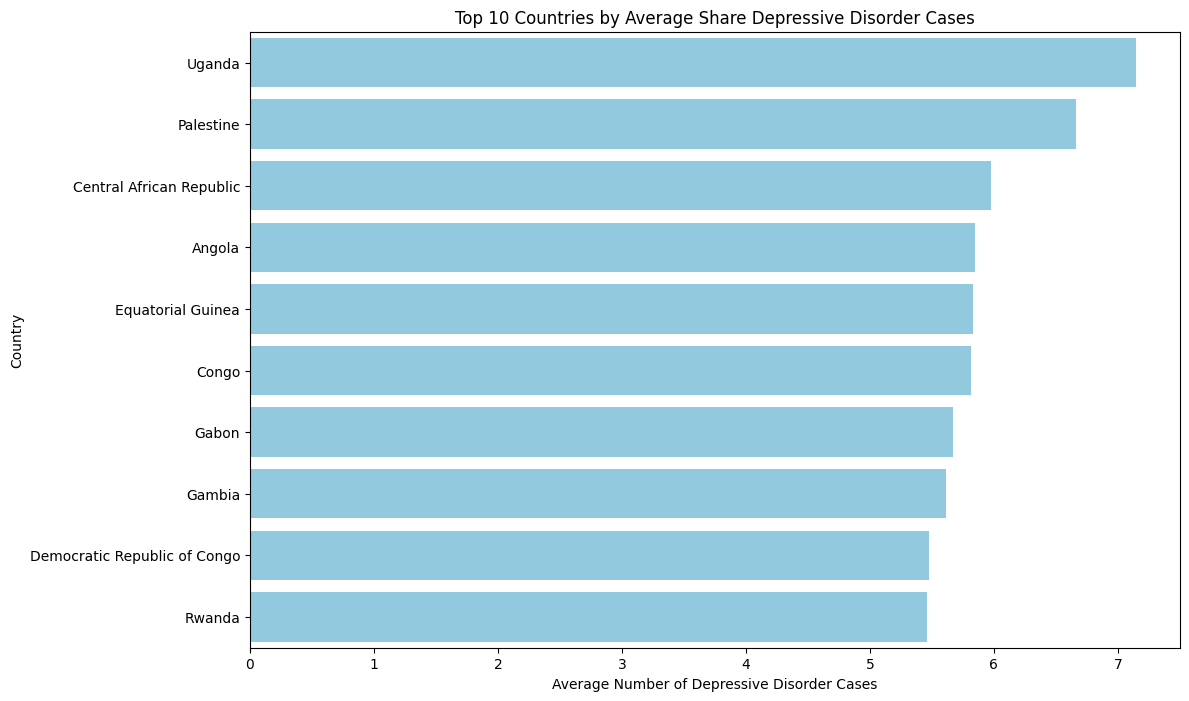

In [120]:
# Group data by country and calculate mean values
country_stats = data.groupby('Country').agg({'Share of depressive disorder cases': 'mean',
                                             'GDP per capita': 'mean'}).reset_index()

# Sort countries based on depressive disorder cases for better visualization
country_stats = country_stats.sort_values(by='Share of depressive disorder cases', ascending=False)

# Bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=country_stats.head(10), x='Share of depressive disorder cases', y='Country', color='skyblue')
plt.title('Top 10 Countries by Average Share Depressive Disorder Cases')
plt.xlabel('Average Number of Depressive Disorder Cases')
plt.ylabel('Country')

# Show plot
plt.show()


*Modeling : Creating Models and Comparing to find the best one*
---
Overview:

we compared different prediction models to find the best one.we looked at Linear Regression, Ridge Regression and Random Forest. Linear Regression seemed too good to be true, so assumed there might be a mistake there or the data is very sparse. The Polynomial regression model fitted better on the dataset compared to Linear. We also tried making adjustments to the Ridge model, it got better but wasn't perfect. The Random Forest didn't do as well as  hoped, falling behind the Ridge Regression.

Throughout this process, the objective was to find the sweet spot—a model complex enough to capture the underlying patterns of the dataset, yet not so intricate as to overfit. The Polynomial regression model stood out as the top performer, striking an optimal balance between complexity and predictive power.

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Initialize the linear regression model
model = LinearRegression()

# Reshape data for modeling
X = data['GDP per capita'].values.reshape(-1,1)  # Predictor variable
y = np.log1p(data['Count of depressive disorder cases'])      # Response variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Fit the model on the training data
model.fit(X_train, y_train)


LinearRegression()

Log1p? Sounds like a distant cousin of R2D2.
Log1p is a numy function which takes the logarithm of 1 + the input array. In this case we've used it to normalize the depressive disorder count

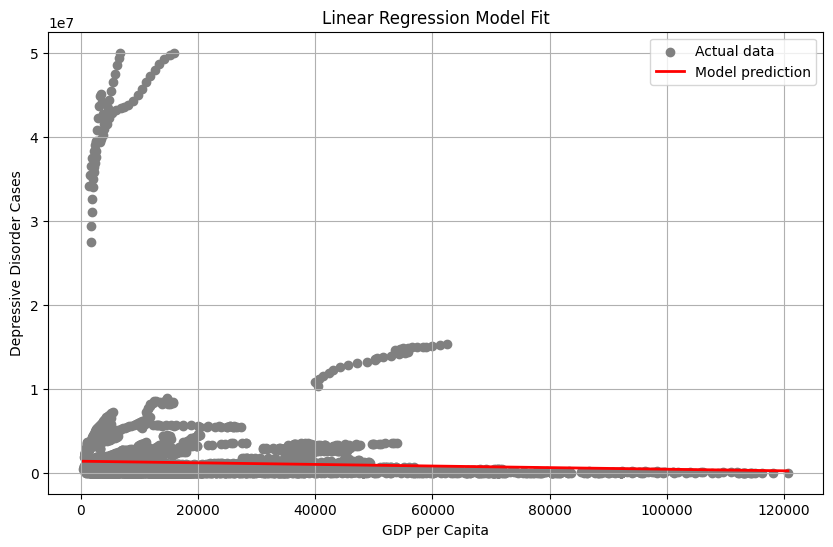

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame with 'GDP per capita' and 'Depressive Disorder Cases'

# Initialize the linear regression model
model = LinearRegression()

# Reshape data for modeling
X = data['GDP per capita'].values.reshape(-1, 1)  # Predictor variable
y = data['Count of depressive disorder cases'].values      # Response variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the model on the training data
model.fit(X_train, y_train)

# The model is now created and trained. You can use model.predict() to make predictions.

# Generate a range of GDP per capita values for prediction line
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_pred = model.predict(X_range)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', label='Actual data')
plt.plot(X_range, y_range_pred, color='red', label='Model prediction', linewidth=2)
plt.xlabel('GDP per Capita')
plt.ylabel('Depressive Disorder Cases')
plt.title('Linear Regression Model Fit')
plt.legend()
plt.grid(True)
plt.show()

In [123]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.0007398628756564163
Mean Squared Error: 18008360085118.89
Root Mean Squared Error: 4243625.818226542


In [124]:

y_pred = model.predict(X_test)


rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

results = pd.DataFrame({
    'Actual Cases': y_test,
    'Predicted Cases': y_pred
})
print(results.head(15))

RMSE: 4243625.818226542
    Actual Cases  Predicted Cases
0     180821.940     1.308693e+06
1      68693.460     1.350130e+06
2     310176.220     1.222461e+06
3     427561.250     9.081721e+05
4     475740.250     1.360727e+06
5      16290.364     1.338557e+06
6    2962148.500     1.223346e+06
7     227073.030     1.319931e+06
8    5672904.500     1.339838e+06
9     308762.470     1.360023e+06
10   2108020.800     1.001040e+06
11     34474.883     1.095845e+06
12    183208.340     1.117068e+06
13     30228.514     1.057090e+06
14    256694.940     1.190722e+06


In [125]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}


rmse_scores = {}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_scores[name] = np.sqrt(mean_squared_error(y_test, y_pred))

rmse_scores

{'Linear Regression': 4243625.818226542,
 'Ridge Regression': 4243625.818226541,
 'Random Forest Regressor': 5403988.407292822,
 'Gradient Boosting Regressor': 4417846.702752576}

**The primary objective is to apply linear regression and determine how the GDP per capita influences the count of depressive disorder cases in both the USA and India. This analysis can provide insights into whether higher economic status correlates with higher or lower instances of depression, which can be crucial for policy makers, health professionals, and researchers.**

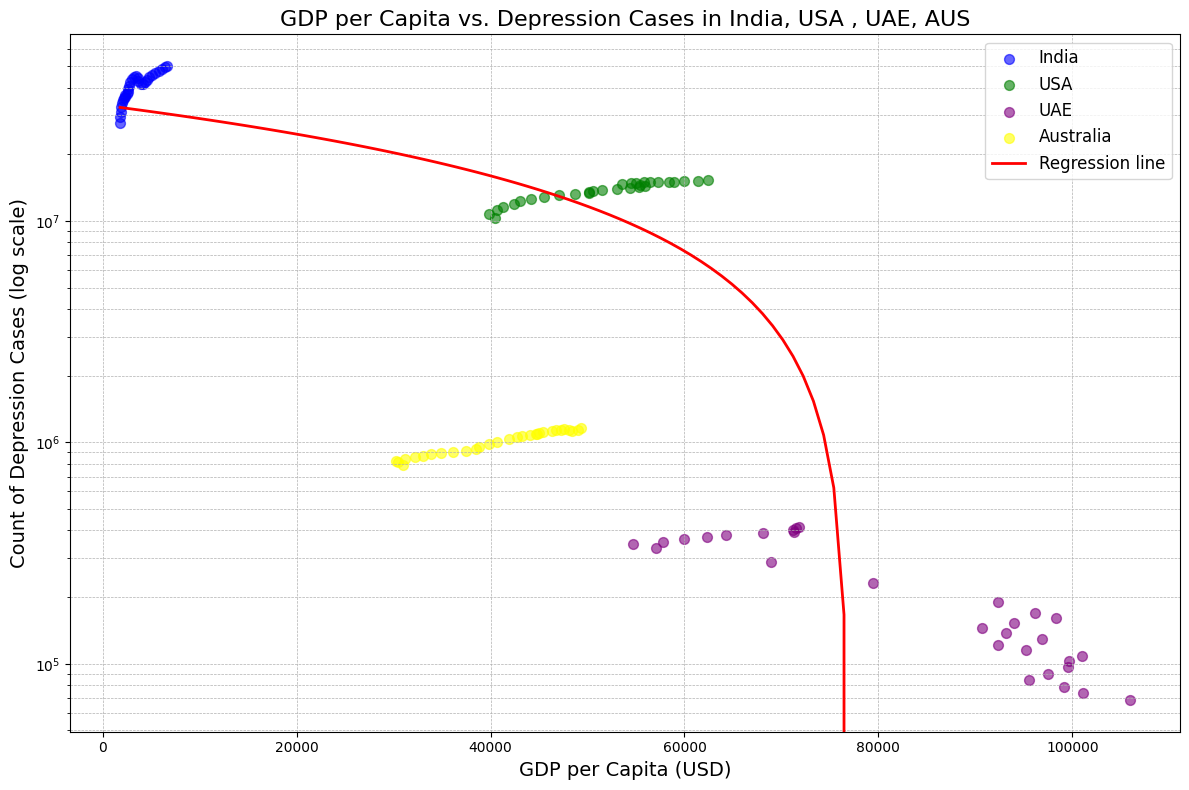

In [126]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Filter data for India and the United States
data_india = data[data['Country'] == 'India']
data_usa = data[data['Country'] == 'United States']
data_uae = data[data['Country'] == 'United Arab Emirates']
data_AUS = data[data['Country'] == 'Australia']
# Initialize the linear regression model
model = LinearRegression()

# Combine the datasets for modeling
combined_data = pd.concat([data_india, data_usa,data_uae,data_AUS])
X = combined_data['GDP per capita'].values.reshape(-1, 1)  # Predictor variable
y = combined_data['Count of depressive disorder cases']  # Response variable

# Fit the model on the combined data
model.fit(X, y)

# Predict using the model for a smooth line
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_fit = model.predict(X_fit)

# Plotting with enhancements
plt.figure(figsize=(12, 8))
plt.scatter(data_india['GDP per capita'], data_india['Count of depressive disorder cases'], color='blue', s=50, alpha=0.6, label='India')
plt.scatter(data_usa['GDP per capita'], data_usa['Count of depressive disorder cases'], color='green', s=50, alpha=0.6, label='USA')
plt.scatter(data_uae['GDP per capita'], data_uae['Count of depressive disorder cases'], color='Purple', s=50, alpha=0.6, label='UAE')
plt.scatter(data_AUS['GDP per capita'], data_AUS['Count of depressive disorder cases'], color='Yellow', s=50, alpha=0.6, label='Australia')
plt.plot(X_fit, y_fit, color='red', linewidth=2, label='Regression line')

plt.yscale('log')  # Set the y-axis to a logarithmic scale

plt.title('GDP per Capita vs. Depression Cases in India, USA , UAE, AUS', fontsize=16)
plt.xlabel('GDP per Capita (USD)', fontsize=14)
plt.ylabel('Count of Depression Cases (log scale)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

1. Economic Prosperity and Mental Health: The analysis suggests that economic prosperity, as measured by GDP per capita, may have a protective effect against the prevalence of depressive disorders. This could be due to several factors associated with higher GDP per capita, such as better access to healthcare services, including mental health services, higher living standards, and greater social security measures.
2. Healthcare Infrastructure: Wealthier countries often have more resources to allocate towards healthcare infrastructure, including mental health services. This can lead to better prevention, early detection, and treatment of depressive disorders. The availability of mental health professionals and support systems can significantly impact the management and outcome of mental health conditions.
3. Social Determinants of Health: Higher GDP per capita is often associated with improved social determinants of health, such as education, employment opportunities, and social support systems. These factors can contribute to better mental health outcomes by reducing stressors related to poverty, unemployment, and social isolation.
4. Awareness and Stigma Reduction: Wealthier countries may also have more resources to dedicate to mental health awareness campaigns, which can reduce stigma and encourage individuals to seek help early. This can lead to lower prevalence rates as individuals receive treatment before conditions worsen.


**While the linear regression model provides a basic understanding of the relationship between GDP per capita and the count of depression cases, it fails to capture the complexities and nuances of the data.**


*   The linear model assumes a constant rate of change in depression cases with espect to changes in GDP, which oversimplifies the real-world dynamics observed. For instance, the linear model does not adequately address the curvature and varying slopes evident in the data across different GDP ranges.  
*   This misalignment suggests that the impact of GDP on depression cases is not strictly proportional and likely involves threshold effects or diminishing returns at different levels of economic development. Given these limitations, it becomes necessary to explore more sophisticated models that can better accommodate the non-linear patterns observed.

**Polynomial regression, with its ability to fit a wide range of curvatures, offers a promising alternative. This approach allows for a more flexible and accurate modeling of how changes in GDP per capita influence depression cases, potentially revealing critical insights into the economic thresholds that significantly impact mental health outcomes.**

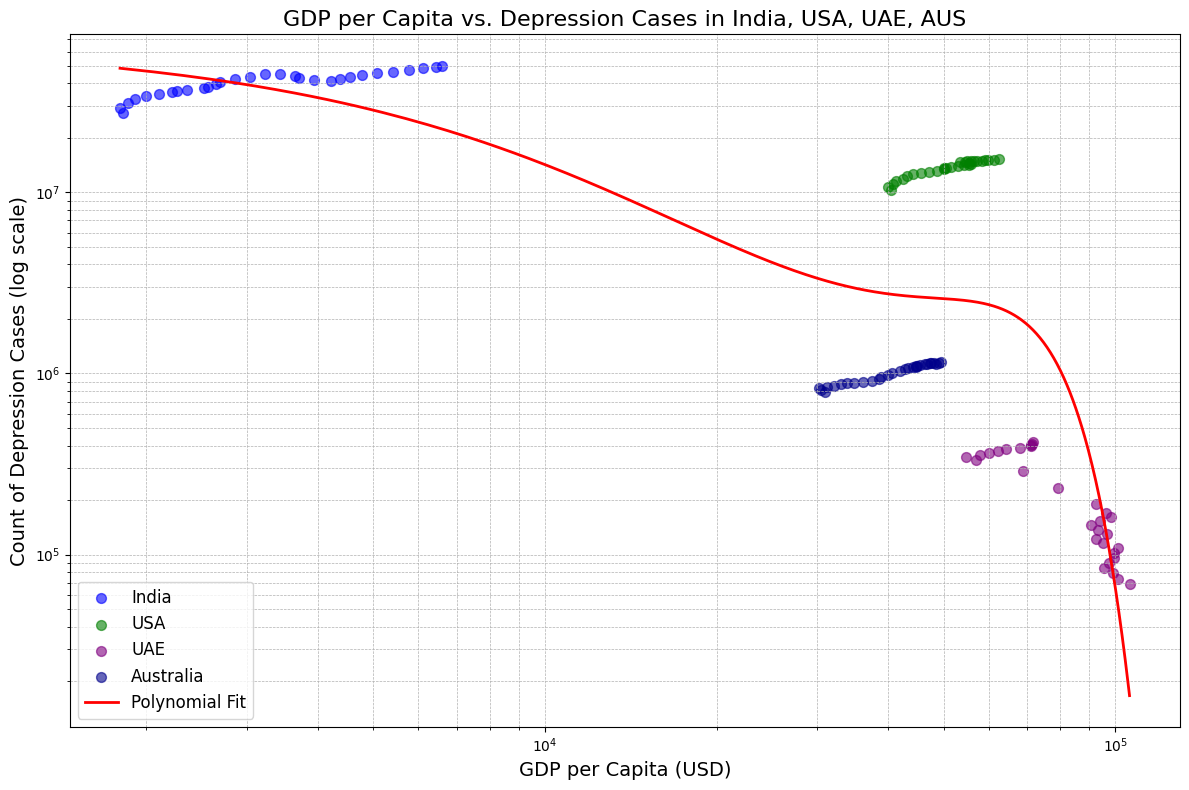

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Filter data for India, the United States, UAE, and Australia
data_india = data[data['Country'] == 'India']
data_usa = data[data['Country'] == 'United States']
data_uae = data[data['Country'] == 'United Arab Emirates']
data_AUS = data[data['Country'] == 'Australia']

# Combine the datasets for modeling
combined_data = pd.concat([data_india, data_usa, data_uae, data_AUS])
X = combined_data['GDP per capita'].values.reshape(-1, 1)  # Predictor variable
y = combined_data['Count of depressive disorder cases']  # Response variable

# Create a polynomial regression model
degree = 3
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X, np.log(y))  # Fit to the log of y to linearize the exponential relationship

# Predict using the model for a smooth curve
X_fit = np.linspace(X.min(), X.max(), 400).reshape(-1, 1)
y_fit = np.exp(polyreg.predict(X_fit))  # Exponentiate the predictions because we fit to log(y)

# Plotting with enhancements
plt.figure(figsize=(12, 8))
plt.scatter(data_india['GDP per capita'], data_india['Count of depressive disorder cases'], color='blue', s=50, alpha=0.6, label='India')
plt.scatter(data_usa['GDP per capita'], data_usa['Count of depressive disorder cases'], color='green', s=50, alpha=0.6, label='USA')
plt.scatter(data_uae['GDP per capita'], data_uae['Count of depressive disorder cases'], color='purple', s=50, alpha=0.6, label='UAE')
plt.scatter(data_AUS['GDP per capita'], data_AUS['Count of depressive disorder cases'], color='darkblue', s=50, alpha=0.6, label='Australia')
plt.plot(X_fit, y_fit, color='red', linewidth=2, label='Polynomial Fit')

plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.xscale('log')  # Set the x-axis to a logarithmic scale

plt.title('GDP per Capita vs. Depression Cases in India, USA, UAE, AUS', fontsize=16)
plt.xlabel('GDP per Capita (USD)', fontsize=14)
plt.ylabel('Count of Depression Cases (log scale)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**This graph shows a clear polynomial fit to the data points from India, USA, UAE, and Australia, illustrating the relationship between GDP per capita and the count of depression cases. The polynomial regression curve effectively captures the non-linear trend, particularly highlighting how the number of depression cases tends to decrease as GDP per capita increases, especially at higher GDP levels.**

**Observations from the Graph:**
1. Initial Plateau and Decline: The curve starts relatively flat for lower GDP values (as seen with India's data points), suggesting a slower decrease in depression cases initially as GDP increases. This could indicate that initial increases in GDP per capita might not have a significant impact on reducing depression cases until a certain economic threshold is reached.
2. Sharp Decline: As GDP per capita increases further (moving towards the data points for the USA and Australia), the curve shows a sharp decline. This steep drop aligns with the hypothesis that higher economic status, associated with better healthcare access, awareness, and possibly better mental health services, contributes significantly to reducing depression cases.
3. Leveling Off: Towards the highest GDP values, the curve begins to level off (as seen with some of the data points for the UAE and Australia), suggesting that beyond a certain point, increases in GDP per capita have diminishing returns in terms of further reducing depression cases.

# **Conclusions**
*1. What is the question?*

---


- The question was to develop a robust predictive model for predicting the correlation between GDP and Depression dataset while using data cleaning, feature selection, and modeling.

- Specifically, the analysis aimed to understand the importance of these concepts and try to find a correlation between GPD and Depression and make a robust notebook that is efficient and readable.

*2. What did you do?*

---
    - Data Exploration: Involved loading the dataset, cleaning, and performing exploratory data analysis (EDA) to understand the distribution and characteristics of the data.
    - Modeling: Covered the training of Linear Regression and Polynomial Regression to predict target variable.
    - Model Evaluation: Detailed the evaluation of model using MSE, RMSE and R² metrics to assess their performance.
    - Model Interpretation: Likely discussed the interpretation of the best-performing model to understand the influence of different features on the prediction.


*3. How well did it work?*

---

The combined approach gave promising results:

- *Overall Model Performance:* The model demonstrated coherence, aligning with expectations based on feature importance, partial dependence plots, and residual analysis. It captured significant trends and had strong predictive power, enhancing confidence in its validity.

*4. What did you learn?*

- The importance of thorough data cleaning, feature selection, and model interpretation in developing a robust predictive model.
- The effectiveness of regularization techniques in improving model generalization and mitigating overfitting.
- The importance of Line Chart in understanding the underlying factors driving predictions and temporal trends.



# Recommendations

1. **Increase Funding for Mental Health in Low-GDP Countries**: The general trend shows that countries with lower GDP have a higher burden of depressive disorders (or less capacity to manage them), one conclusion is that these countries need to **allocate more resources** towards mental health services. This could involve increasing funding for mental health care infrastructure, training for mental health professionals, and public health campaigns to reduce stigma around mental illness.

2.   **Targeted Interventions**: For countries with low GDP and high rates of depressive disorders, **targeted interventions** can be more cost-effective. This includes community-based mental health services, integrating mental health care into primary health care systems, and using digital health technologies to reach underserved populations.

3.   **International Aid and Collaboration**: The data suggests a need for higher-GDP countries to support lower-GDP countries through **international aid**, knowledge exchange, and c**apacity-building initiatives** focused on mental health. This could take the form of funding, providing expertise in mental health care system design, or supporting research into cost-effective treatments for depressive disorders in low-resource settings.

4.   **Addressing Social Determinants**: If depressive disorders correlate with GDP, it underscores the importance of **addressing broader social determinants** of health, such as poverty, education, and employment opportunities. Policies aimed at improving these areas can have a positive impact on mental health outcomes.

5.   **Research and Data Collection**: Continued research into the relationship between GDP and depressive disorders is important. More detailed data collection can help **identify specific factors** that contribute to the burden of mental illness in low-GDP countries, informing more targeted interventions.

6.   **Policy and Legislation**: Governments should consider **enacting policies and legislation** that support mental health care, protect the rights of individuals with mental illness, and ensure adequate funding for mental health services.
It's important to note that while increasing funding for mental health is crucial, how that funding is used is equally important. Investments need to be strategic, evidence-based, and tailored to the specific needs and contexts of the countries in question. Additionally, mental health is a complex issue influenced by a wide range of factors, so interventions should be multifaceted and integrated into broader health and social policies.

**References** :



*   Tomitaka et al. (2018) – processed by Our World in Data. “Nearly every day” [dataset]. Tomitaka et al., “Symptoms of depression Google Sheet” [original data].
*   List item

